<a href="https://colab.research.google.com/github/Preetitamrakar-phd/Internship-At-The-Sparks-Foundation-/blob/main/Task_2_prediction_of_optimum_number_of_clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA SCIENCE AND BUSINESS ANALYTICS INTERN at SPARKS FOUNDATION #GRIPJAN21**


**Preeti Tamrakar**

**TASK #2: Prediction using Unsupervised ML**

To do: From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.

Given task is to predict the optimal number of cluster, so we can use k-means clustering algorithm for this task.

In [2]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
iris_df.shape # shows total number of rows and columns

(150, 4)

In [5]:
iris_df.isnull().sum()  # check for null values

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [6]:
# dividing it into attribute and target
X = iris.data
y = iris.target

Data Visualization

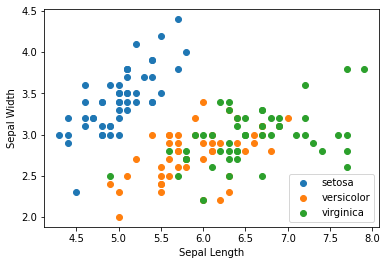

In [7]:
# between sepal length and width

plt.scatter(X[y == 0, 0], X[y == 0, 1], label = 'setosa')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label = 'versicolor')
plt.scatter(X[y == 2, 0], X[y == 2, 1], label = 'virginica')
plt.legend(loc='lower right') 
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

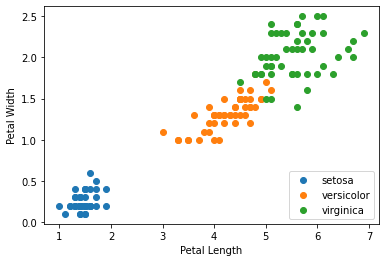

In [8]:
# between petal length and width

plt.scatter(X[y == 0, 2], X[y == 0, 3], label = 'setosa')
plt.scatter(X[y == 1, 2], X[y == 1, 3], label = 'versicolor')
plt.scatter(X[y == 2, 2], X[y == 2, 3], label = 'virginica')
plt.legend(loc='lower right') 
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

We can conclude from the plot, that petal length and petal width are the better predictors.

**Applying the K-Means Algorithm to find the optimum number of clusters**

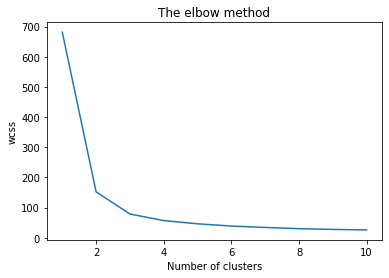

In [12]:
from sklearn.cluster import KMeans

# Experimenting with some values of 'K' to find out the optimal value

wcss = [] #  within cluster sum of squares which helps to find the optimum no of clusters

for i in range(1, 11):
    km = KMeans(n_clusters = i)
    km.fit(X)
    wcss.append(km.inertia_) # calculates wcss

# Now plotting a graph which shows us the 'elbow' i.e. a point after the graph changes from exponential to linear
    
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss') 
plt.show()


In [13]:
# Creating the kmeans classifier
km = KMeans(n_clusters = 3)
y_pred = km.fit_predict(X)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [14]:
iris_df['clusters']=y_pred
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Visualizing the clusters of sepal length and width


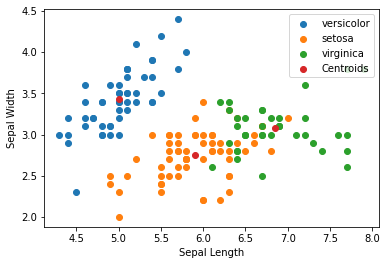

In [15]:
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], label = 'versicolor')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], label = 'setosa')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], label = 'virginica')

# Plotting the centroids.

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:,1], label = 'Centroids')
plt.legend(loc='upper right') 
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

Visualizing the clusters of petal length and width

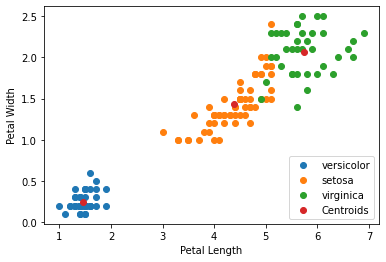

In [16]:
plt.scatter(X[y_pred == 0, 2], X[y_pred == 0, 3], label = 'versicolor')
plt.scatter(X[y_pred == 1, 2], X[y_pred == 1, 3], label = 'setosa')
plt.scatter(X[y_pred == 2, 2], X[y_pred == 2, 3], label = 'virginica')

# Plotting the centroids. This time we're going to use the cluster centres 

plt.scatter(km.cluster_centers_[:, 2], km.cluster_centers_[:,3], label = 'Centroids')
plt.legend(loc='lower right') 
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

By this way, we have predicted the optimum number of clusters (3 clusters) and also we have visualized it by using scatter plot.

**Task #2 is completed.**